    -DATA COLUMNS
1. sabit asit
2. uçucu asitliği
3. sitrik asit
4. artık şeker
5. klorürler
6. serbest sülfür dioksit
7. toplam sülfür dioksit
8. yoğunluk
9. pH
10. sülfatlar
11. alkol
12. Çıkış değişkeni (duyusal verilere göre): kalite (0 ile 10 arasında puan). Var olan kalite puanlar;3, 4, 5, 6, 7, 8

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
df=data.copy()
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [9]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

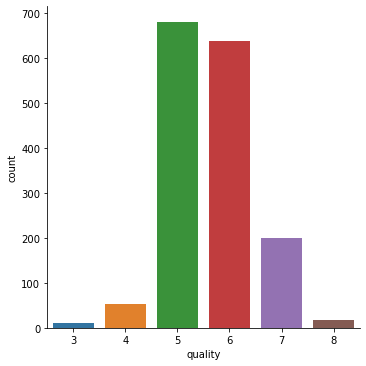

In [11]:
sns.catplot(x="quality" , data=df , kind="count")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

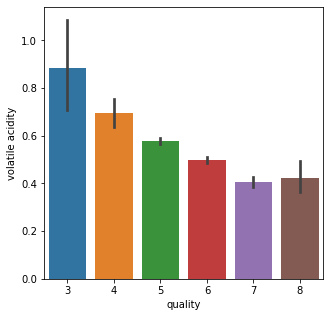

In [13]:
#volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality" , y="volatile acidity" , data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

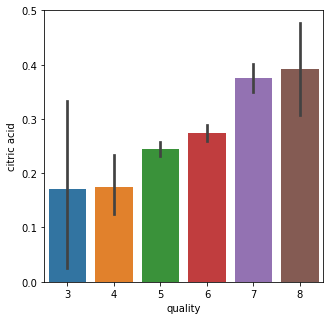

In [14]:
#citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality" , y="citric acid" , data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

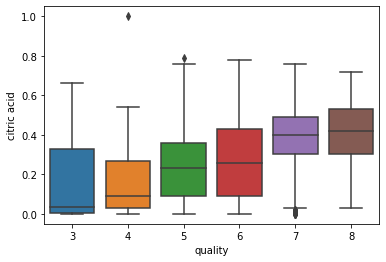

In [33]:
sns.boxplot(x= 'quality', y = 'citric acid', data = data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

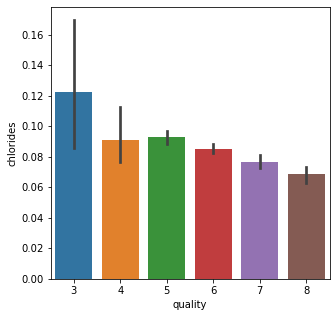

In [16]:
#chlorides vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality" , y="chlorides" , data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

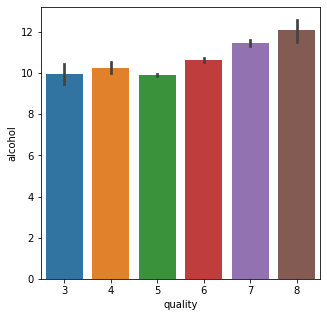

In [20]:
#alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality" , y="alcohol" , data=df)

In [49]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    """
    dataset: Veri seti
    rows: Satır sayısı
    cols: sütün sayısı
    plot_type: Çizdirilecek grafik türü
    """
    
    #Veri setindeki sütünların isimleri alınıyor
    column_names=dataset.columns.values
    #Kaç tane sütün olduğu bulunuyor
    number_of_column=len(column_names)
    
    #Satır*sütün boyutlarında alt grafik içeren
    #matris oluşturuluyor. Matrisin genişliği:22 yüksekliği:16
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0# Çizimi yapılacak özelliğin column_names listesindeki indeks değerini tutuyor
    for i in range(rows):
        for j in range(cols):
            """
            i: satır numarasını tutuyor
            j: sütün numarasını tutuyor
            axarr[i][j]: Çizilen grafigin grafik matrisindeki yerini belirliyor
            """
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

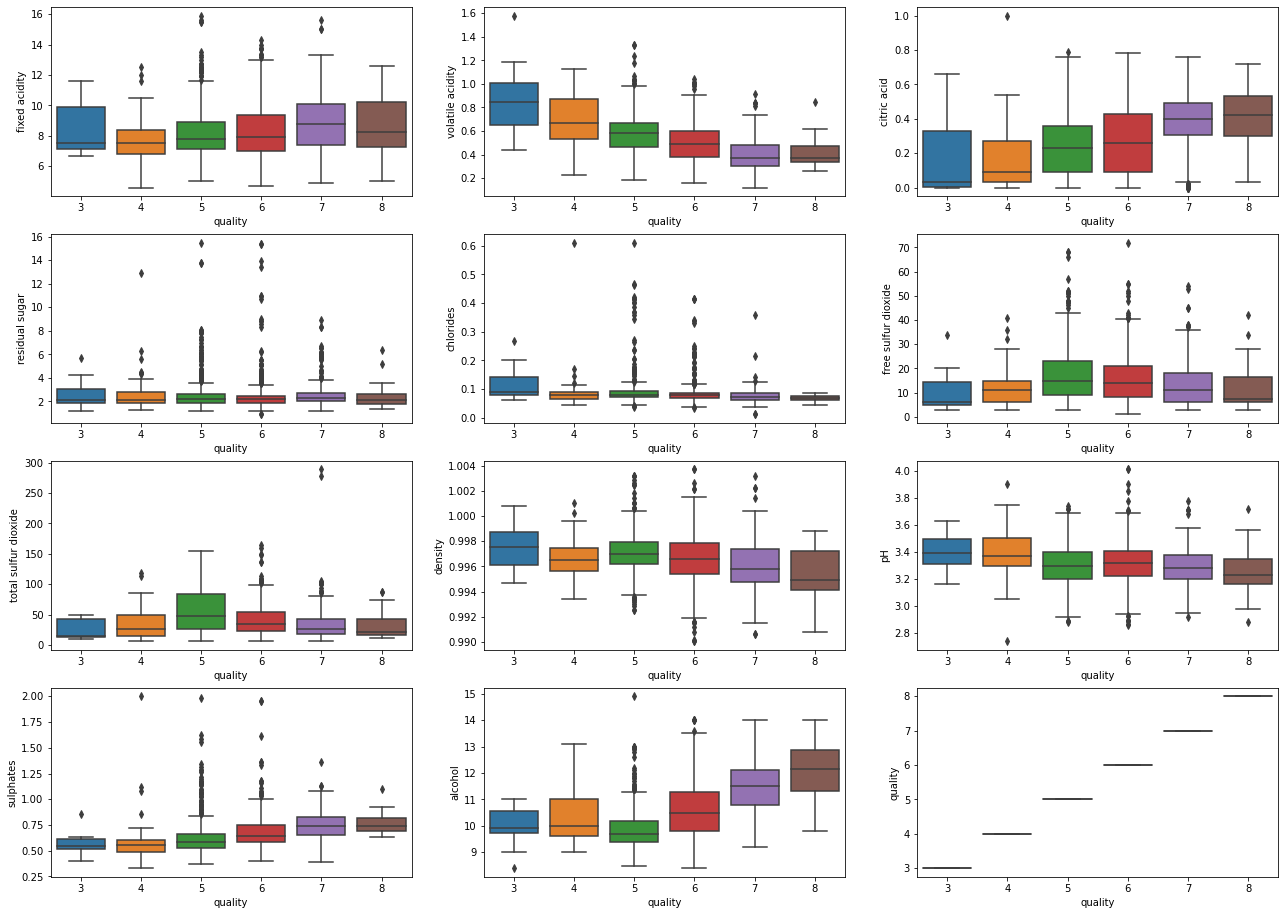

In [51]:
draw_multivarient_plot(df,4,3,"box")

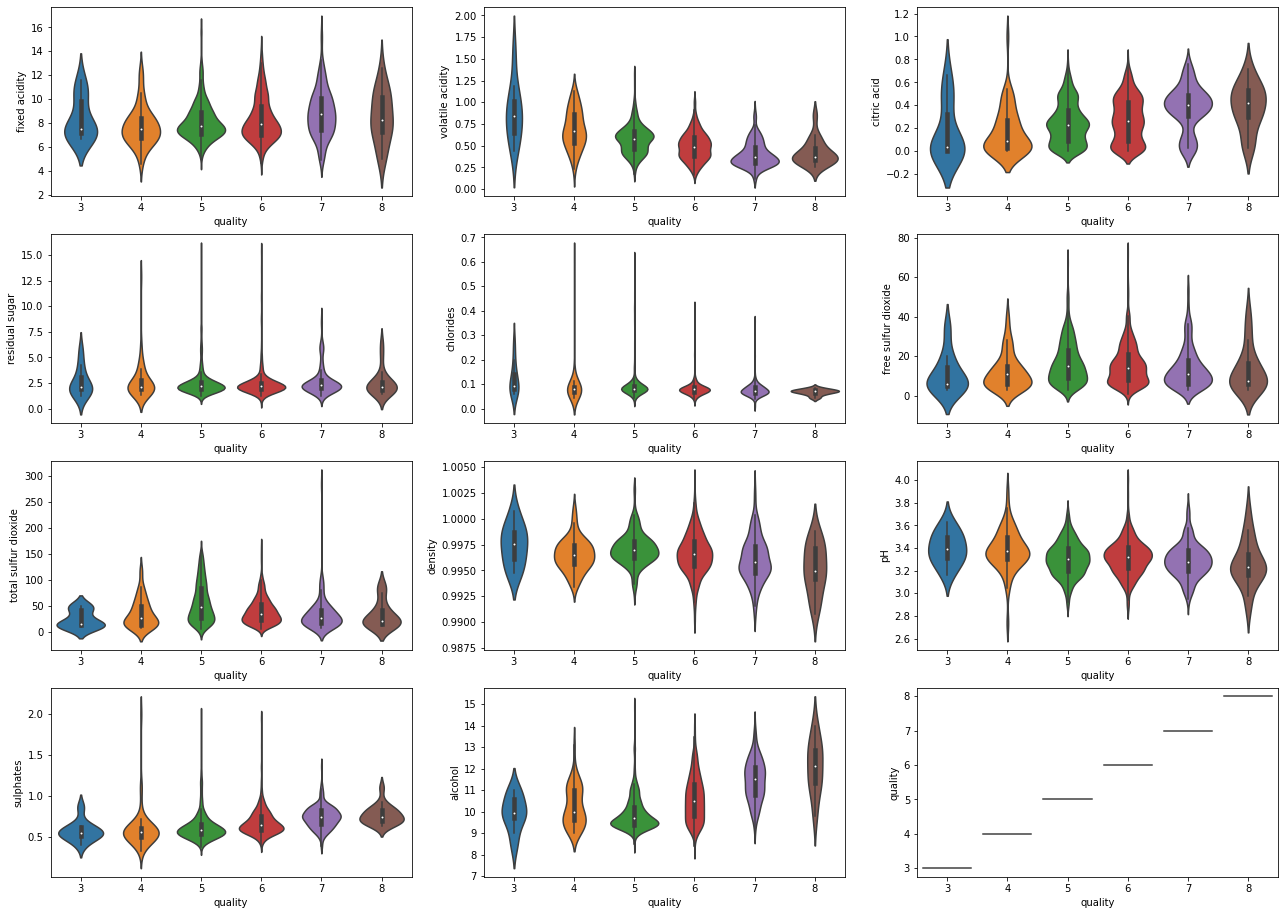

In [53]:
draw_multivarient_plot(df,4,3,"violin")

- Correlation
1. Negative Correlation
2. Positive Correlation

<AxesSubplot:>

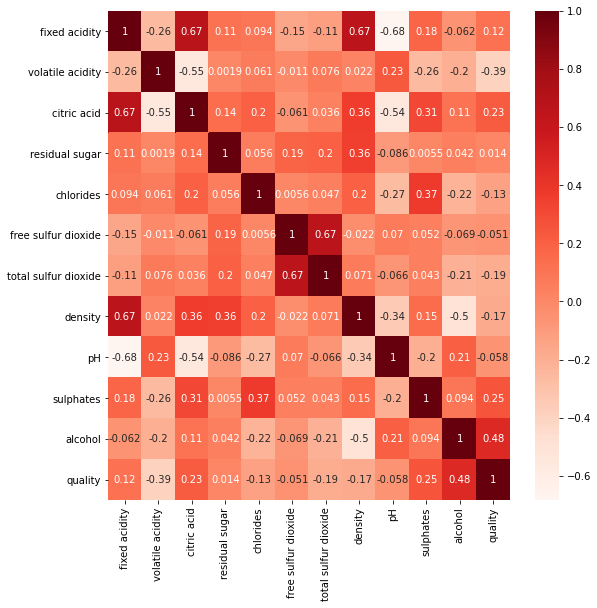

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr() , annot=True , cmap="Reds")

Data Prepocessing

In [26]:
X = df.drop(columns="quality" , axis=1)

In [34]:
#Label Binarization   kalitede 7 den büyükse 1 , küçükse 0
Y= df["quality"].apply(lambda y_value:1 if y_value>7 else 0 )


#* 0 = bad quality wine
#* 1 = good quality wine

StandartScaler

In [41]:
#scale the data using StandartScaler for PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
print(X[0:2])  # 0 ile 1 arasında

[[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711]]


### PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(X)   #pca parametre almadı. 8 değerli yapacağız ama. aşağıda

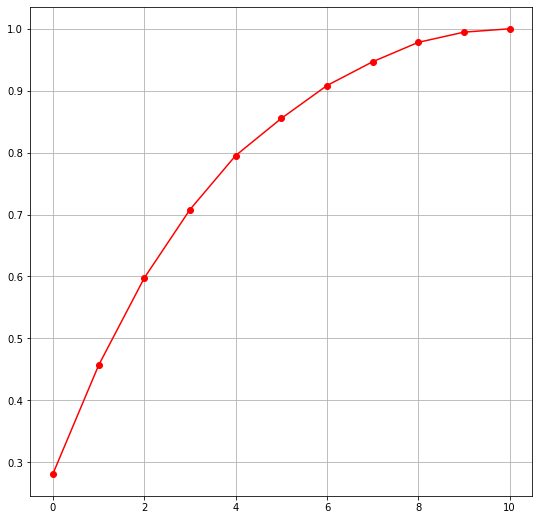

In [45]:
#plotting pca
plt.figure(figsize=(9,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_) ,"ro-")
plt.grid()

In [46]:
# 8 pca attribute bize %90 üstü değer veriyor.    #8 kolon yeterli diyoruz.
pca_new = PCA(n_components = 8)
X = pca_new.fit_transform(X)

Train Test Split

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=1/3 , random_state=2)

In [48]:
print(X.shape," = " ,X_train.shape,"+" , X_test.shape )

(1599, 8)  =  (1066, 8) + (533, 8)


## MODELLING

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print("***********")
print(lr_acc_score*100)

[[526   0]
 [  7   0]]
***********
98.68667917448406


### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print("***********")
print(rf_acc_score*100)

[[526   0]
 [  6   1]]
***********
98.87429643527204
